<a href="https://colab.research.google.com/github/nsy2nv/model/blob/master/DeepNeuralNetCifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from keras.datasets import cifar10
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Activation, Convolution2D, MaxPooling2D, Dropout
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt


In [30]:
batch_size = 32 # in each iteration, we consider 32 training examples at once
num_epochs = 20 # we iterate 200 times over the entire training set
kernel_size = 3 # we will use 3x3 kernels throughout
pool_size = 2 # we will use 2x2 pooling throughout
conv_depth_1 = 32 # we will initially have 32 kernels per conv. layer...
conv_depth_2 = 64 # ...switching to 64 after the first pooling layer
drop_prob_1 = 0.25 # dropout after pooling with probability 0.25
drop_prob_2 = 0.5 # dropout in the FC layer with probability 0.5
hidden_size = 512 # the FC layer will have 512 neurons

[[[154 177 187]
  [126 137 136]
  [105 104  95]
  ...
  [ 91  95  71]
  [ 87  90  71]
  [ 79  81  70]]

 [[140 160 169]
  [145 153 154]
  [125 125 118]
  ...
  [ 96  99  78]
  [ 77  80  62]
  [ 71  73  61]]

 [[140 155 164]
  [139 146 149]
  [115 115 112]
  ...
  [ 79  82  64]
  [ 68  70  55]
  [ 67  69  55]]

 ...

 [[175 167 166]
  [156 154 160]
  [154 160 170]
  ...
  [ 42  34  36]
  [ 61  53  57]
  [ 93  83  91]]

 [[165 154 128]
  [156 152 130]
  [159 161 142]
  ...
  [103  93  96]
  [123 114 120]
  [131 121 131]]

 [[163 148 120]
  [158 148 122]
  [163 156 133]
  ...
  [143 133 139]
  [143 134 142]
  [143 133 144]]]


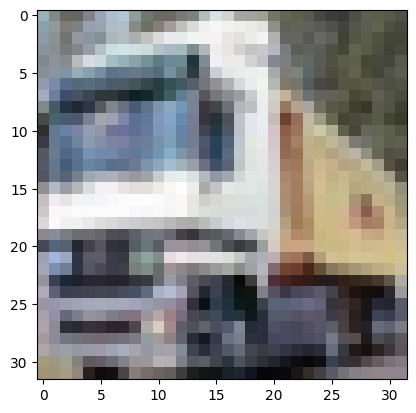

In [32]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data() # fetch CIFAR-10 data

plt.imshow(X_train[1])

print(X_train[1])

In [33]:
num_train, depth, height, width = X_train.shape # there are 50000 training examples in CIFAR-10
num_test = X_test.shape[0] # there are 10000 test examples in CIFAR-10
num_classes = np.unique(y_train).shape[0] # there are 10 image classes

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= np.max(X_train) # Divides each value by the maximum value in the dataset [0, 1] range
X_test /= np.max(X_train) # Divides each value by the maximum value in the dataset [0, 1] range

In [34]:
Y_train = to_categorical(y_train, num_classes) # One-hot encode the labels
Y_test = to_categorical(y_test, num_classes) # One-hot encode the labels

In [38]:
inp = Input(shape=(depth, height, width)) # N.B. depth goes first in Keras!
# Conv [32] -> Conv [32] -> Pool (with dropout on the pooling layer)
conv_1 = Convolution2D(conv_depth_1, kernel_size, kernel_size, padding='same', activation='relu')(inp)
conv_2 = Convolution2D(conv_depth_1, kernel_size, kernel_size, padding='same', activation='relu')(conv_1)
pool_1 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_2)
drop_1 = Dropout(drop_prob_1)(pool_1)
# Conv [64] -> Conv [64] -> Pool (with dropout on the pooling layer)
conv_3 = Convolution2D(conv_depth_2, kernel_size, kernel_size, padding='same', activation='relu')(drop_1)
conv_4 = Convolution2D(conv_depth_2, kernel_size, kernel_size, padding='same', activation='relu')(conv_3)
pool_2 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_2)
drop_2 = Dropout(drop_prob_1)(pool_2)
# Now flatten to 1D, apply FC -> ReLU (with dropout) -> softmax
flat = Flatten()(drop_2)
hidden = Dense(hidden_size, activation='relu')(flat)
drop_3 = Dropout(drop_prob_2)(hidden)
out = Dense(num_classes, activation='softmax')(drop_3)

In [36]:
model = Model(inputs=inp, outputs=out) # To define a model, just specify its input and output layers

model.compile(loss='categorical_crossentropy', # using the cross-entropy loss function
              optimizer='adam', # using the Adam optimiser
              metrics=['accuracy']) # reporting the accuracy


# Train the model using the training set...
model.fit(X_train, Y_train, batch_size=batch_size,epochs=num_epochs,verbose=1, validation_split=0.1) # ...holding out 10% of the data for validation

Epoch 1/20
1407/1407 [==============================] - 14s 9ms/step - loss: 1.8235 - accuracy: 0.3284 - val_loss: 1.5924 - val_accuracy: 0.4222
Epoch 2/20
1407/1407 [==============================] - 12s 9ms/step - loss: 1.6033 - accuracy: 0.4117 - val_loss: 1.4978 - val_accuracy: 0.4448
Epoch 3/20
1407/1407 [==============================] - 12s 9ms/step - loss: 1.5363 - accuracy: 0.4367 - val_loss: 1.3982 - val_accuracy: 0.4972
Epoch 4/20
1407/1407 [==============================] - 12s 9ms/step - loss: 1.4884 - accuracy: 0.4569 - val_loss: 1.3773 - val_accuracy: 0.5048
Epoch 5/20
1407/1407 [==============================] - 13s 9ms/step - loss: 1.4531 - accuracy: 0.4703 - val_loss: 1.3276 - val_accuracy: 0.5132
Epoch 6/20
1407/1407 [==============================] - 13s 9ms/step - loss: 1.4262 - accuracy: 0.4816 - val_loss: 1.3170 - val_accuracy: 0.5208
Epoch 7/20
1407/1407 [==============================] - 12s 9ms/step - loss: 1.4004 - accuracy: 0.4905 - val_loss: 1.3186 - val_ac

#Test the Model


In [39]:
model.evaluate(X_test,Y_test, verbose=1) # Evaluate the trained model on the test set!

313/313 [==============================] - 1s 4ms/step - loss: 290.6050 - accuracy: 0.3147


[290.60504150390625, 0.31470000743865967]

In [40]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 32)        896       
                                                                 
 conv2d_10 (Conv2D)          (None, 4, 4, 32)          9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 2, 2, 32)          0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 2, 2, 32)          0         
                                                                 
 flatten_1 (Flatten)         (None, 128)               0         
                                                           